<br>
<p style="text-align:left;"><font size='15'><b> Moore's Law  </b></font></p>
<p style="text-align:left;"><font size='6'><b> With a Hand-Crafted Linear Regression </b></font></p>

<h4 align='left'>  Prepared by Radu Stoian

<br> 

[Link to Data Source (Wikipedia)](https://en.wikipedia.org/wiki/Transistor_count)

---

# <a name="intro"></a><font color='#347B98'> 0 - Purpose of Notebook</font> <font size='3'></font>


#### Create a linear regression model to describe the relationship between time (in years) and the number of transistors on integrated circuits

# <a name="intro"></a><font color='#347B98'> 1 - Setup and Create Linear Regression Class</font> <font size='3'></font>

## $\Delta$ 1.1 - Import Packages

In [14]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import annotations

## $\Delta$ 1.2 - One-Feature Simple Linear Regression Class

In [14]:

class SimpleLinearRegression:
    
    def __init__(self):
        self.a = None
        self.b = None
        
    def __repr__(self):
        return "SimpleLinearRegression(" + str(self.a) + "," + str(self.b) + ")"
        
    def fit(self, x: np.ndarray, y: np.ndarray) -> SimpleLinearRegression:
        denom = x.dot(x) - x.mean() * x.sum()
        a = ( x.dot(y) - y.mean() * x.sum() ) / denom
        b = ( y.mean() * x.dot(x) - x.mean() * x.dot(y) ) / denom
        self.a = a
        self.b = b
        return self
        
    def predict(self, x: np.ndarray) -> float:
        if self.a == None or self.b == None:
            raise ValueError("instance must be `fit` before this operation can be carried out")
        else:
            return x.dot(self.a) + self.b
        
    def get_r2(self, x: np.ndarray, y: np.ndarray) -> float:
        yHat = self.predict(x)
        residuals = y - yHat
        diffs = y - y.mean()
        return 1 - residuals.dot(residuals) / diffs.dot(diffs)
    
    def plot_reg(self, x: np.ndarray, y: np.ndarray) -> None:
        plt.scatter(x, y)
        plt.plot(x, self.predict(x), "r")
        plt.show()

## $\Delta$ 1.3 - Test Class on Made-Up Data

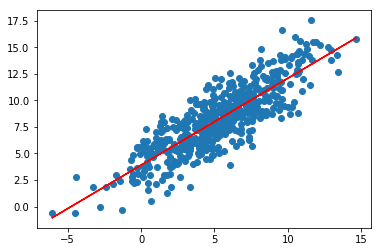

In [15]:
# creating a dataset of two strongly correlated correlated variables
M = np.random.multivariate_normal([5, 8], [[10, 8], [8, 9]], 500)

x, y = M[:, 0], M[:, 1]

# seeing if our line of best fit holds up
reg_test = SimpleLinearRegression().fit(x, y)

# seems to deliver!
reg_test.plot_reg(x, y)

# <a name="intro"></a><font color='#347B98'> 2 - Validate Moore's Law Using Data From Wikipedia</font> <font size='3'></font>

## $\Delta$ 2.1 - Pull Dataset and Examine

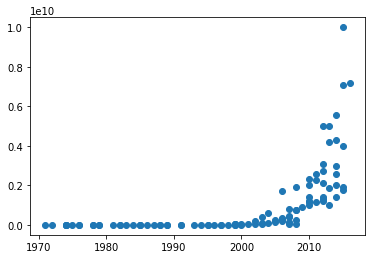

In [16]:
# Pull
X = []
Y = []

non_decimal = re.compile(r'[^\d]+')

for line in open("moore.csv"):
    r = line.split("\t")
    
    x = int(non_decimal.sub("", r[2].split("[")[0]))
    y = int(non_decimal.sub("", r[1].split("[")[0]))
    X.append(x)
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

#  The number of transistors on integrated circuits doubles every 2 years, meaning that growth is exponential
plt.scatter(X, Y)
plt.show()

## $\Delta$ 2.2 - Take Natural Logarithm of Y; Use Transformed Y in Regression

 
    r2 is: 0.952944285228576, a is: 0.3510435733650199, b is: -685.000284381709
    



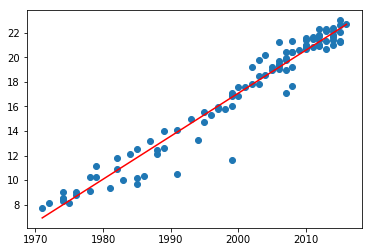

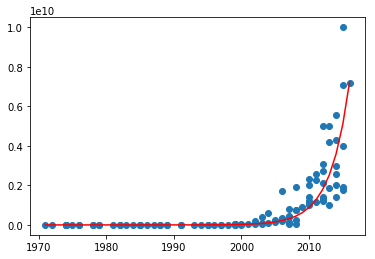

In [22]:
# take log pf Y
log_Y = np.log(Y)

moores_reg = SimpleLinearRegression().fit(X, log_Y)

print(""" 
    r2 is: {0}, a is: {1}, b is: {2}
    
""".format(moores_reg.get_r2(X, log_Y), moores_reg.a, moores_reg.b))

# there is a strong linear relationship between log_X and log_Y
moores_reg.plot_reg(X, log_Y)

# converting everything back to normal scale and plotting
plt.scatter(X, Y)
plt.plot(X, np.exp(moores_reg.predict(X)), "r")
plt.show()

## $\Delta$ 2.3 - Predict the Number of Transitors for the Year 2050

In [28]:
# a big number!
np.exp(moores_reg.predict(np.array([2019]))[0])

20768229794.99939

[[7, 1, 1], [1, 9, 1], [1, 1, 6]]

In [135]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# creating a dataset of two strongly correlated correlated variables
E = [[7, 4, 5], 
     [4, 9, 1],
     [5, 1, 6]]
M = np.random.multivariate_normal([5, 8, 8], E, 80)

y, X = M[:, 0], M[:, 1:]

# add ones
#ones = np.ones((X.shape[0], 1))
#X = np.append(X, ones, axis=1)
#X[:, 0] = X[:, 0] + 5

w = np.linalg.solve(X.T.dot(X), X.T.dot(y))
X.shape

(80, 2)

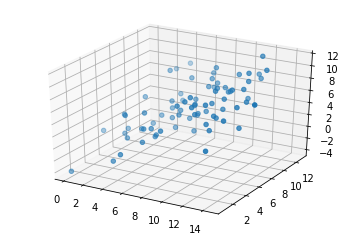

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X[:,0], X[:,1], y)
plt.show()

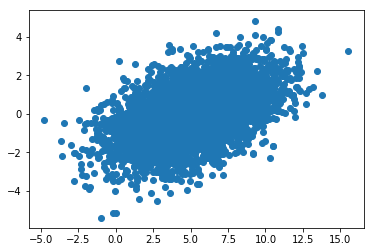

In [67]:
residuals = y - X.dot(w)

plt.scatter(y, residuals)

In [185]:
class MultipleLinearRegression:
    
    def __init__(self):
        self.w = np.array([])
        
    def __repr__(self):
        return "MultipleLinearRegression(" + str(self.w) + ")"
    
    def __validate_inputs(self, X: np.ndarray, y: np.ndarray) -> None:
        if not len(X.shape) > 1:
            raise ValueError("X must be a 2D numpy array")
        if not len(y.shape) == 1:
            raise ValueError("y must be a 1D numpy array")
        
    def fit(self, X: np.ndarray, y: np.ndarray) -> MultipleLinearRegression:
        self.__validate_inputs(X, y)
        ones = np.ones((X.shape[0], 1))
        X = np.append(X, ones, axis=1)
        w = np.linalg.solve(X.T.dot(X), X.T.dot(y))
        self.w = w
        return self
        
    def predict(self, X: np.ndarray) -> float:
        if len(self.w) == 0:
            raise ValueError("linear regression instance must be fit before this operation can be carried out")
        else:
            ones = np.ones((X.shape[0], 1))
            X = np.append(X, ones, axis=1)
            return X.dot(self.w)
        
    def get_r2(self, X: np.ndarray, y: np.ndarray) -> float:
        yHat = self.predict(X)
        residuals = y - yHat
        diffs = y - y.mean()
        return 1 - residuals.dot(residuals) / diffs.dot(diffs)
    
    def plot_reg(self, X: np.ndarray, y: np.ndarray) -> None:
        
        if X.shape[1] in (1,2):
            yHat = self.predict(X)
            
            if X.shape[1] == 1:
                plt.scatter(X, y)
                plt.plot(X, yHat, "r")
                plt.show()
            else:
                fig = plt.figure()
                ax = fig.add_subplot(111, projection="3d")
                #ax.plot_wireframe(X[:,0], X[:,1], y, rstride=1, cstride=1)
                ax.scatter(X[:,0], X[:,1], y)
                plt.show()
        else:
            ValueError("shape of X must be 1 or 2 for plotting")
        
    def plot_residual(self, X: np.ndarray, y: np.ndarray) -> None:
        yHat = self.predict(X)
        diff = y - yHat
        plt.scatter(y, diff)
        plt.show()      

In [186]:
y

array([ 2.62264573,  8.22559248,  7.10570602,  0.66614603,  4.42196052,
        6.49834762,  2.34283326,  1.89493141, -0.50981136,  2.83598799,
        0.57443614,  6.59313071,  1.17089987, -1.87299087,  6.22461273,
        6.06458024,  0.60937678,  4.3519407 ,  7.72215095,  8.24326596,
        6.67477914,  1.09236406,  7.88643392,  9.41893151,  2.36755032,
        0.06463432,  8.94188898,  9.93412932,  7.05546271,  8.02105776,
        6.23958038,  3.18707261,  0.10429639,  4.2736073 ,  3.85493778,
        2.0766103 ,  7.6917595 , -3.96636627,  3.65191626,  2.51276446,
        6.20140656,  4.02393138,  2.31614509,  1.15831168,  1.36737258,
        7.50880878,  4.42047047,  3.97927274,  5.75597549,  4.55246394,
        6.80478809,  3.38769415,  4.77442499, -0.15193612,  2.4334643 ,
        6.53699883,  5.30271266,  5.93215208,  5.69610552,  7.45518005,
        7.67901717,  7.46996916,  6.85878367,  4.71837544,  4.78768498,
        3.85089351,  3.18190309,  1.00064697,  3.33554506, 11.25

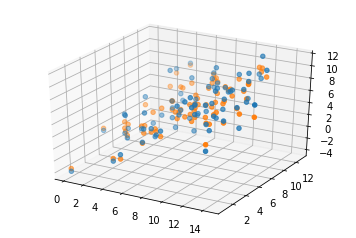

In [187]:
reg2 = MultipleLinearRegression()

reg2.fit(X,y)

reg2.plot_reg(X, y)

In [163]:
reg2

MultipleLinearRegression([])